# Project 2 - Ames Housing Data
## Modeling Tuning And Insights

![House](images/phil-hearing-house-small.jpg)
<br>Photo by:
https://unsplash.com/photos/IYfp2Ixe9nM?utm_source=unsplash&utm_medium=referral&utm_content=creditShareLink

In [753]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score

from matplotlib.ticker import FuncFormatter

In [754]:
houses = pd.read_csv('../datasets/train_processed.csv')
houses.head()

Id        PID  MS SubClass  MS Zoning  Lot Frontage  Lot Area  Street  \
0  109  533352170           60          7       69.0552     13517       2   
1  544  531379050           60          7       43.0000     11492       2   
2  153  535304180           20          7       68.0000      7922       2   
3  318  916386060           60          7       73.0000      9802       2   
4  255  906425045           50          7       82.0000     14235       2   

   Alley  Lot Shape  Land Contour  ...  Neighborhood_OldTown  \
0      0          1             3  ...                     0   
1      0          1             3  ...                     0   
2      0          0             3  ...                     0   
3      0          0             3  ...                     0   
4      0          1             3  ...                     0   

   Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  \
0                   0                    1                     0   
1                   0                    0                     1   
2                   0                    0                     0   
3                   0                    0                     0   
4                   0                    0                     1   

   Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    1   
4                     0                     0                    0   

   Neighborhood_Veenker  floors  bathrooms  
0                     0       2        3.0  
1                     0       2        4.0  
2                     0       1        2.0  
3                     0       2        3.0  
4                     0       2        2.0  

[5 rows x 109 columns]

#### Create feature set to measure if being in a neighborhood close to Iowa State has a positive correlation.

The problem statement was to gauge whether or not a home's value would have a premium (5%) than other neighborhoods that are farther away from the university.

By looking at several real estate web sites, and Google maps, I determined the following neighborhood values are located close to the Iowa State campus:
>* BrkSide	(Brookside)
*Crawfor	(Crawford)
*Edwards
*IDOTRR	(Iowa DOT and Rail Road)
*OldTown	(Old Town)
*SWISU	South & West of Iowa State University
*Sawyer

![Iowa State](images/ISU_Hoods.png)
---
Null Hypothesis $H_0$:
Properties located in the neighborhoods have a 5% relative sales price.


Althernative Hypothesis $H_A$: Prices in the seven neighborhoods closest to Iowa State do not have a 5% higher price premium.



Model with each of the neighborhoods near Iowa state, along with a list of other features.

#### Linear Regression

In [755]:
lr = LinearRegression()

In [756]:
features = ['Overall Qual', 'Year Built','1st Flr SF','2nd Flr SF','Garage Cars','bathrooms',
            'Lot Shape','near_ISU']

X = houses[features]
y = houses['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)

In [757]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

lr.fit (X_train, y_train)

LinearRegression()

In [758]:
y_preds = lr.predict(X_test)
print (f'The r squared value of the linear regresssion model with highly negatively correlated features: {r2_score(y_test, y_preds)}') 

The r squared value of the linear regresssion model with highly negatively correlated features: 0.7904926999656456


In [759]:
pd.DataFrame(list(zip(X.columns, lr.coef_)), columns=['Feature', 'Coefficient'])

# From class session 3.03
# https://git.generalassemb.ly/pdmill/3.03-intro-to-linear-regression/blob/master/linear-regression-starter.ipynb

Feature   Coefficient
0  Overall Qual  32142.924685
1    Year Built   9471.605005
2    1st Flr SF  34093.460843
3    2nd Flr SF  18101.751382
4   Garage Cars   6629.579533
5     bathrooms   5913.475240
6     Lot Shape   2023.910145
7      near_ISU   3122.602863

As with all of the other features, being near Iowa State (ISU) has a positive coefficent.

This implies that if a house is in one of the seven close neighborhoods, the price should go up by $3,122.


Would we reject our null hypothesis, that a house is worth than 5% by being close to the Iowa State campus?



In [786]:
mean_price = houses['SalePrice'].mean()

print (f'The average price of all houses in the data set is: ${round(mean_price , 2):,.2f} ')

print (f'5 percent of the average is ${round(mean_price * 0.05 , 2):,.2f}  ')

The average price of all houses in the data set is: $180,995.11 
5 percent of the average is $9,049.76  


Since \\$3,122 is less than 5%, we reject the null hypothesis $H_0$.

---
Our model is generally predicting sale prices too high, as shown in the chart below.

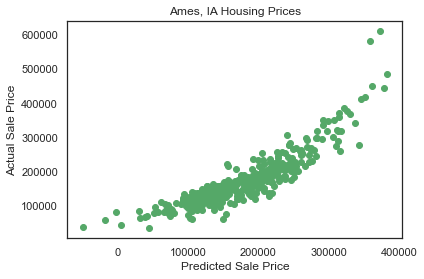

In [761]:
plt.scatter(x=y_preds,
            y=y_test,
            color = 'g')
plt.title('Ames, IA Housing Prices')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Actual Sale Price');

---
Try modeling with each individual neighborhood name, which were turned into dummy variables

In [762]:
features = ['Overall Qual', 'Year Built','1st Flr SF','2nd Flr SF','Garage Cars','bathrooms',
            'Lot Shape', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
            'Neighborhood_IDOTRR','Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer']    
    
X = houses[features]
y = houses['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)

In [763]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

lr.fit (X_train, y_train)

LinearRegression()

In [764]:
y_preds = lr.predict(X_test)
print (f'The r squared value of the linear regresssion model: {r2_score(y_test, y_preds)}') 

The r squared value of the linear regresssion model: 0.7913263929690275


In [765]:
output = pd.DataFrame(list    (zip    (X.columns, (lr.coef_ ))))
output[1] = output[1].map('{:.2f}'.format).astype(float)

# Formatting trick found here:
# https://stackoverflow.com/questions/20937538/how-to-display-pandas-dataframe-of-floats-using-a-format-string-for-columns

output.columns =['Feature', 'Coefficient']
output

Feature  Coefficient
0           Overall Qual     31484.91
1             Year Built     10337.30
2             1st Flr SF     34198.91
3             2nd Flr SF     17998.57
4            Garage Cars      6288.37
5              bathrooms      6221.38
6              Lot Shape      1725.86
7   Neighborhood_BrkSide      2576.76
8   Neighborhood_Crawfor      3621.97
9   Neighborhood_Edwards      -135.03
10   Neighborhood_IDOTRR      1830.38
11  Neighborhood_OldTown      1716.62
12    Neighborhood_SWISU      -238.91
13   Neighborhood_Sawyer      1447.93

Most neighborhoods near Iowa State have a positive relationship, except for South & West of Iowa State University.

In [766]:
chart = output.iloc[7:14,0:2].sort_values(by='Coefficient', ascending=False)
chart.columns =['Neighborhood', 'Coefficient']
chart

Neighborhood  Coefficient
8   Neighborhood_Crawfor      3621.97
7   Neighborhood_BrkSide      2576.76
10   Neighborhood_IDOTRR      1830.38
11  Neighborhood_OldTown      1716.62
13   Neighborhood_Sawyer      1447.93
9   Neighborhood_Edwards      -135.03
12    Neighborhood_SWISU      -238.91

In [767]:

chart_x = chart['Neighborhood'].str.replace('Neighborhood_', '')
chart_y = chart['Coefficient']

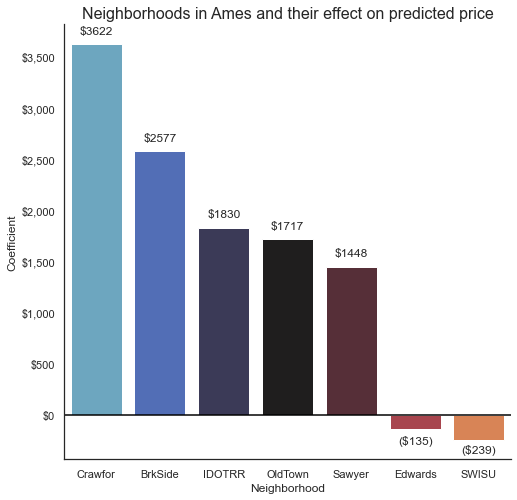

In [787]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=chart_x, y=chart_y, data=chart,palette="icefire")
ax.axhline(0, color='black')

f = lambda x, pos: f'${x:,.0f}'
ax.yaxis.set_major_formatter(FuncFormatter(f))

sns.set_style("white")

ax.grid(False)
plt.title("Neighborhoods in Ames and their effect on predicted price", size=16);

sns.despine()

# Y tick label code snippet found here:
#https://stackoverflow.com/questions/53747298/how-to-format-seaborn-matplotlib-axis-tick-labels-from-number-to-thousands-or-mi

# Learned about despine() and set_style() here:
# https://www.codecademy.com/articles/seaborn-design-i

ax.text(0,3722, '$3622', ha='center')
ax.text(1,2677, '$2577', ha='center')
ax.text(2,1930, '$1830', ha='center')
ax.text(3,1817, '$1717', ha='center')
ax.text(4,1548, '$1448', ha='center')
ax.text(5,-280, '($135)', ha='center')
ax.text(6,-370, '($239)', ha='center');



---
Next examine all neighborhoods in Ames, IA.

In [769]:
features = ['Year Built','1st Flr SF','2nd Flr SF','Garage Cars','floors','bathrooms',
            'Lot Shape', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
            'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 
            'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 
            'Neighborhood_Greens', 'Neighborhood_GrnHill', 'Neighborhood_IDOTRR', 
            'Neighborhood_Landmrk', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
            'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 
            'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
            'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 
            'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
            'Neighborhood_Veenker']    
    
X = houses[features]
y = houses['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)

In [770]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

lr.fit (X_train, y_train)

LinearRegression()

In [771]:
y_preds = lr.predict(X_test)
print (f'The r squared value of the linear regresssion model: {r2_score(y_test, y_preds)}') 

The r squared value of the linear regresssion model: 0.7902073268874588


In [772]:
all_hoods = pd.DataFrame(list    (zip    (X.columns, (lr.coef_ ))))
all_hoods[1] = all_hoods[1].map('{:.2f}'.format)

# Formatting trick found here:
# https://stackoverflow.com/questions/20937538/how-to-display-pandas-dataframe-of-floats-using-a-format-string-for-columns

all_hoods.columns =['Feature', 'Coefficient']


In [773]:
# Slice out only the rows with Neighborhoods
chart_top_bottom = all_hoods.iloc[7:33,0:2]
chart_top_bottom['Coefficient'] = chart_top_bottom['Coefficient'].astype(float)

In [774]:
chart_top_bottom.sort_values(by='Coefficient', ascending=False)

Feature  Coefficient
25  Neighborhood_NridgHt     17155.98
31  Neighborhood_StoneBr     12597.76
12  Neighborhood_Crawfor      6204.84
30  Neighborhood_Somerst      6161.24
24  Neighborhood_NoRidge      5952.43
32   Neighborhood_Timber      3869.18
16  Neighborhood_GrnHill      3419.36
11  Neighborhood_CollgCr      3380.16
9   Neighborhood_BrkSide      2917.88
10  Neighborhood_ClearCr      1713.02
26  Neighborhood_OldTown      1394.64
15   Neighborhood_Greens      1170.46
27    Neighborhood_SWISU       700.54
17   Neighborhood_IDOTRR      -190.69
14  Neighborhood_Gilbert      -326.64
7   Neighborhood_Blueste      -339.76
18  Neighborhood_Landmrk      -495.24
8    Neighborhood_BrDale      -612.79
21    Neighborhood_NAmes      -687.82
28   Neighborhood_Sawyer      -699.09
22  Neighborhood_NPkVill     -1366.13
23   Neighborhood_NWAmes     -1737.25
20  Neighborhood_Mitchel     -1763.14
19  Neighborhood_MeadowV     -1834.36
29  Neighborhood_SawyerW     -2097.92
13  Neighborhood_Edwards     -2965.66

The neighborhood with the largest price premium is Northridge  (which is in the north side of Ames), while the neighborhood with the worst premium is Edwards.

### Create some other models to improve score on Kaggle

In [775]:
print ('All features:' , houses.columns.values.tolist())

All features: ['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Lot Config', 'Land Slope', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch S

In [776]:
len(houses.columns.values.tolist())

109

Don't include the Id or PID columns.

In [777]:
feature_list = houses.columns.values.tolist()[3:85:1]

In [778]:
#list(feature_list)

In [779]:
# feature_list.remove('Garage Cars') # Highly correlated with Garage Area
# feature_list.remove('TotRms AbvGrd') # Highly correlated with Gr Liv Area
# feature_list.remove('Fireplaces') # Highly correlated with Fireplace Qu
# feature_list.remove('1st Flr SF') # Highly correlated with Total Bsmt SF
# feature_list.remove('BsmtFin Type 1') # Highly correlated with Bsmt Qual

# # Very Important to remove SalePrice from our list of features
try:
    feature_list.remove('SalePrice')
except:
    pass

In [780]:
X = houses[feature_list]
y = houses['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)

In [781]:
ss = StandardScaler()

Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

In [782]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=50000)

# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train);   # Changed from Z_train to X_train since X_train has our scaled data

# Borrowed from
# https://git.generalassemb.ly/DSIR-1116/4.02-lesson-regularization/blob/master/solution-code/solution-code.ipynb

In [783]:
print(f'Lasso CV score with training data: {lasso_cv.score(Z_train, y_train)} ')
print(f'Lasso CV score with testing data: {lasso_cv.score(Z_test, y_test)} ')

Lasso CV score with training data: 0.9045809128866454 
Lasso CV score with testing data: 0.8779392855290777 
